# Linear Regression with Boston Housing Dataset


Description of the dataset: 

Boston dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass.
In total, there are 506 instances (rows) and each has 14 attributes (columns). Target variable is`MEDV` or *Median value of owner-occupied homes in $1000's*with the other 13 being corresponding values like: per capita crime rate by town, proportion of non-retail business acres per town, and average number of rooms per dwelling.

## 1. Loading the Data

In [12]:
from sklearn.datasets import load_boston
# load Boston dataset
boston_df = load_boston()
# print(boston_df.DESCR)



## 2. Import cuDF and build a dataframe

In [13]:
import cudf

# build dataframe from data key
boston_gdf = cudf.DataFrame(list(boston_df.data))

# set column names to feature_names
boston_gdf.columns = boston_df.feature_names

# add MEDV column from target ---> median value in $1000  (PRICE)
boston_gdf['MEDV'] = boston_df.target

# let's see what we're working with
boston_gdf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 3. Train Test Split 

In [14]:
from cuml.preprocessing.model_selection import train_test_split

In [15]:
# set X to all variables except the target variable
X = boston_gdf.drop('MEDV', axis=1)
# set Y to  price --> MEDV
Y = boston_gdf['MEDV']

In [16]:
# train/test split (70:30)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7)

## 4.  Fit Linear Regression Model using cuML 

In [17]:
from cuml import LinearRegression
from sklearn.metrics import mean_squared_error

In [18]:
# call Linear Regression model
mlr = LinearRegression()

# train the model for multiple regression
mlr.fit(X_train, Y_train)

# make predictions for test X values
Y_pred = mlr.predict(X_test)

# calculate error
mmse = mean_squared_error(Y_test, Y_pred)
print(mmse)

22.670512007050863


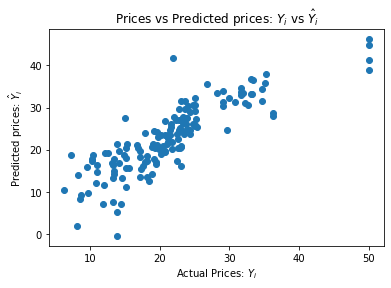

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
# scatter actual and predicted results
plt.scatter(Y_test, Y_pred)

# label graph
plt.xlabel("Actual Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

plt.show()